In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from copy import deepcopy
from math import floor

In [2]:
# Modèle
def model(X, W, b) :
    return np.dot(X, W) + b

In [3]:
# Fonction sigmoide (1 + exp(-z)) ^ -1
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

# Matrice sigmoide
def sigmoid_matrix(Z) :
    return sigmoid(Z)


In [4]:
# Fonction cost
def log_loss(A, Y) :
    return -np.sum(np.dot(Y.T, np.log(A)) + np.dot((1 - Y).T, np.log(1 - A))) / len(Y) # problème de log(0) à revoir

In [5]:
# Gradients
def gradient(X, Y, A) :
    return np.dot(X.T, (A - Y)) / len(Y)

# Descent gradient
def descent_gradient(W, b, X, Y, A, pas_dentrainement) :
    W -= pas_dentrainement * gradient(X, Y, A)
    b -= pas_dentrainement * np.sum(A - Y) / len(Y)
    return W, b

In [6]:
# Predict
def predict(X, W, b) :
    Z = model(X, W, b)
    A = sigmoid_matrix(Z)
    return A

In [7]:
# Neuronne
def neuron(X, Y, pas_dentrainement = 0.1 , nombre_iter = 100) :
    W = np.random.randn(2, 1)
    b = randint(-50, 50)
    loss = list()

    for i in range(nombre_iter) :
        Z = model(X, W, b)
        A = sigmoid_matrix(Z)
        # loss.append(log_loss(A, Y))
        W, b = descent_gradient(W, b, X, Y, A, pas_dentrainement)
    
    # Courbe d'évolution de l'erreur en fonction du nbre d'apprentissage

    # plt.title("Evolution de l'erreur en fonction de l'apprentissage")
    # plt.plot(loss, label = "Fonction coût (Log loss)")
    # plt.xlabel("nombre d'apprentissage")
    # plt.ylabel("Erreur")
    # plt.legend()
    # plt.show()

    return W, b, A

In [8]:
# Dataset
nombre_points = 100
x1 = np.arange(1, floor(nombre_points / 2))
x2 = np.random.randint(50, 90, (1, len(x1)))
x2[0][45], x2[0][46], x2[0][47], x2[0][48] = randint(10, 50), randint(10, 50),randint(10, 50),randint(10, 50)
X1 = x1
X2 = x2[0]
Y = np.ones((1, len(x1)))
x1_copy1, x2_copy1 = deepcopy(x1), deepcopy(x2)

x1 = np.arange(floor(nombre_points / 2), nombre_points)
x2 = np.random.randint(10, 50, (1, len(x1)))
X1 = np.concatenate((X1, x1))
X2 = np.concatenate((X2, x2[0]))
Y = np.concatenate((Y[0], np.zeros((1, len(x1)))[0]))
Y = Y.reshape(len(Y), 1)
x1_copy2, x2_copy2 = deepcopy(x1), deepcopy(x2)

X = np.hstack((X1.reshape(len(X1), 1), X2.reshape(len(X2), 1)))

W, b, A = neuron(X, Y)

In [9]:
# Test avec une cellule
X = np.array([49, 35])
probabilité = predict(X, W, b)[0]
print("Cellule canceureuse ? ", probabilité >= 0.5)

Cellule canceureuse ?  True


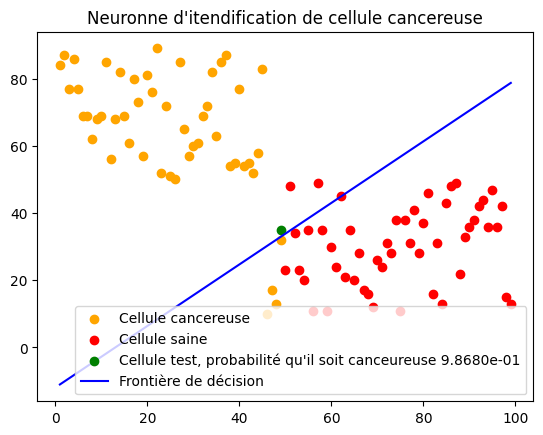

In [ ]:
# Trace de la frontiere de decision
x_frontiere = np.linspace(min(x1_copy1), max(x1_copy2), 100)
y_frontiere = - (x_frontiere * W[0] + b) / W[1]
plt.title("Neuronne d'itendification de cellule cancereuse")
plt.scatter(x1_copy1, x2_copy1, color = 'orange', label = "Cellule cancereuse")
plt.scatter(x1_copy2, x2_copy2, color = 'red', label = "Cellule saine")
plt.scatter(X[0], X[1], color = "green", label = f"Cellule test, probabilité qu'elle soit cancéreuse {probabilité:.4e}")
plt.plot(x_frontiere, y_frontiere, color = "blue", label = "Frontière de décision")
plt.legend()
plt.show()